In [1]:
import pandas as pd
import pickle
import lxml.html
from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')
#display more dataframe data
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
sns.set_palette('pastel')

/home/zy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [38]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
with open('../data/boardgamedata.pickle', 'rb') as f:
    worddata, numdata = pickle.load(f)
    
worddata.reset_index(drop=True, inplace=True)

In [3]:
#edit out html artifacts
worddata['description'] = worddata['description'].apply(lambda x: lxml.html.fromstring(x).text_content())

### plot by category

In [100]:
def create_cat_df(df,column,nametext):
    list_ = []
    for i in df[column]:
        for cat_ in i:
            list_.append(cat_)
    set_ = set(list_)
    print(f"Number of unique {nametext} : {len(list(set_))}")
    
    cat_dict = {}
    for cat_ in set_:
        cat_dict[cat_] = df[column].apply(lambda x: cat_ in x).sum()
        
    cat_df = pd.DataFrame.from_dict(cat_dict, orient='index', columns=['#']).reset_index()
    cat_df.columns=[nametext,'Num']
    cat_df=cat_df.sort_values(['Num'],ascending=False).reset_index(drop=True)
    
    return cat_df

In [4]:
CATEGORIES = []
for i in worddata['category']:
    for cat_ in i:
        CATEGORIES.append(cat_)
CATEGORIES = set(CATEGORIES)

In [33]:
len(list(CATEGORIES))

91

In [5]:
cat_dict = {}
for cat_ in CATEGORIES:
    cat_dict[cat_] = worddata['category'].apply(lambda x: cat_ in x).sum()


In [12]:
cat_df = pd.DataFrame.from_dict(cat_dict, orient='index', columns=['#']).reset_index()

In [15]:
cat_df.columns=['Category','Num']
cat_df=cat_df.sort_values(['Num'],ascending=False).reset_index(drop=True)

In [16]:
cat_df

,Category,Num
0,Card Game,17372
1,Wargame,12216
2,Expansion for Base-game,9379
3,Children's Game,9044
4,Dice,7876
...,...,...
86,Arabian,177
87,Post-Napoleonic,150
88,Pike and Shot,126
89,American Indian Wars,122


### plot bar graph of top 10 categories

In [106]:
def plot_cat_bar(df,nametext,num):
    sns.color_palette("viridis")
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":18,
                             "axes.labelsize":18,'legend.fontsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15}) 
    plt.figure(figsize=(10,10))
    sns.barplot(x='Num',y=nametext,data=df.iloc[0:num])
    plt.title(f'Top {num} Boardgame {nametext}')

    plt.savefig(f'../img/top{nametext}.png',dpi=300)

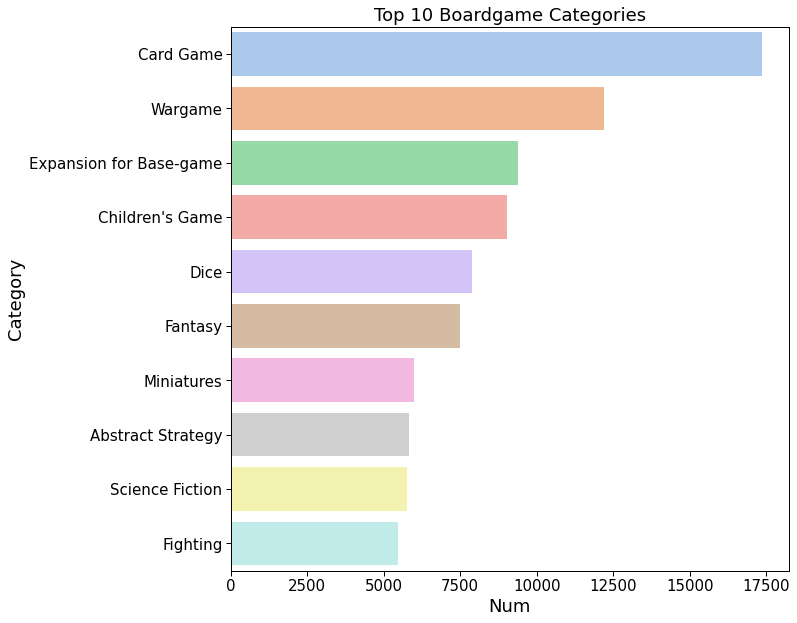

In [92]:
sns.color_palette("viridis")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":18,
                             "axes.labelsize":18,'legend.fontsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15}) 
plt.figure(figsize=(10,10))
sns.barplot(x='Num',y='Category',data=cat_df.iloc[0:10])
plt.title('Top 10 Boardgame Categories')

plt.savefig('../img/topcategory.png',dpi=300)

### plot pie chart of categories

In [134]:
def plot_cat_pie(df,columnname,nametext,num):
    #plots a pie chart of top *num* of categories, grouping the rest as "Others"
    
    #separating top *num* of rows from the rest
    df_pie = df.iloc[0:num]
    #finding the total entries in "Others"
    others_sum = df['Num'].iloc[num:].sum()
    #finding the number of categories in "Others"
    others_num = df['Num'].iloc[num:].shape[0]
    #printing the number of categories in "Others"
    print(f"Number of Categories in Others: {others_num}")
    #append new "Others" row to original df
    df_pie = df_pie.append({columnname:f'Others({others_num})','Num':others_sum},ignore_index=True)
    print(df_pie)
    #creating the pie chart
    pie, ax = plt.subplots(figsize=[30,30])
    labels = df_pie[columnname]
    plt.pie(x=df_pie['Num'], 
            autopct="%.1f%%", 
            explode=[0.05]*(num+1), 
            labels=labels,
           pctdistance=0.95,
           shadow=0.5,
           textprops={'fontsize':18})
    plt.title(f"Top {num} Boardgame {nametext}", fontsize=30)

    plt.savefig(f'../img/{nametext}_pie.png',dpi=300)

In [117]:
cat_pie = cat_df.iloc[0:30]

In [120]:
others_num = cat_df['Num'].iloc[30:].shape[0]
others_num

61

In [118]:
others_sum = cat_df['Num'].iloc[30:].sum()
cat_pie = cat_pie.append({'Category':'Others(61)','Num':others_sum},ignore_index=True)
cat_pie

,Category,Num
0,Card Game,17372
1,Wargame,12216
2,Expansion for Base-game,9379
3,Children's Game,9044
4,Dice,7876
5,Fantasy,7491
6,Miniatures,6006
7,Abstract Strategy,5828
8,Science Fiction,5772
9,Fighting,5466


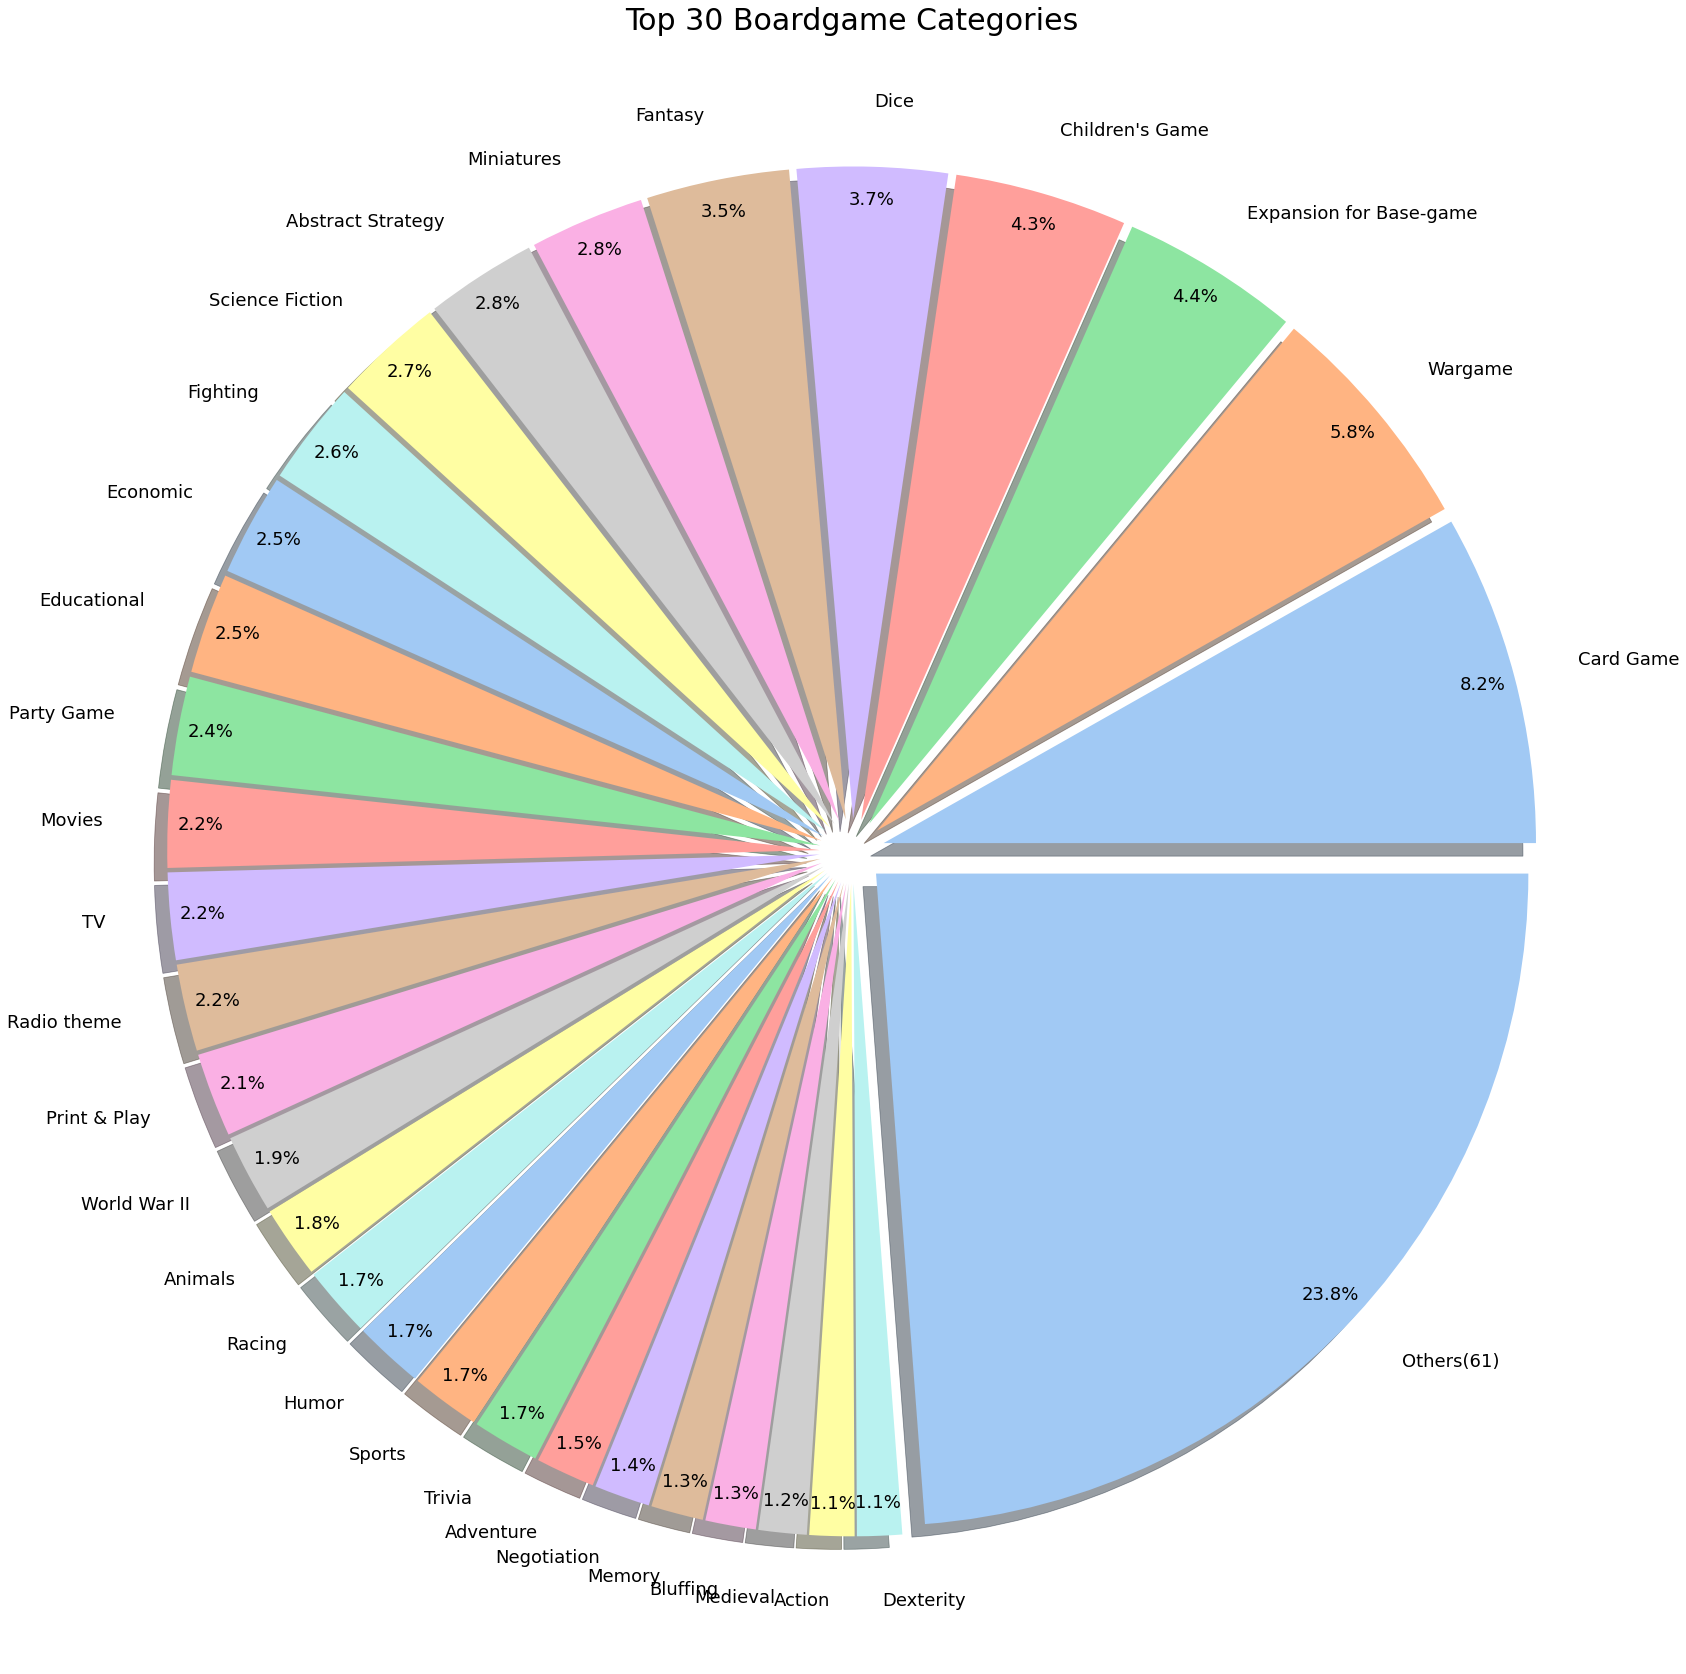

In [121]:
pie, ax = plt.subplots(figsize=[30,30])
labels = cat_pie['Category']
plt.pie(x=cat_pie['Num'], 
        autopct="%.1f%%", 
        explode=[0.05]*31, 
        labels=labels,
       pctdistance=0.95,
       shadow=0.5,
       textprops={'fontsize':18})
plt.title("Top {30} Boardgame Categories", fontsize=30)

plt.savefig('../img/category_pie.png',dpi=300)

In [123]:
cat_df

,Category,Num
0,Card Game,17372
1,Wargame,12216
2,Expansion for Base-game,9379
3,Children's Game,9044
4,Dice,7876
...,...,...
86,Arabian,177
87,Post-Napoleonic,150
88,Pike and Shot,126
89,American Indian Wars,122


Number of Categories in /'Others/': 66


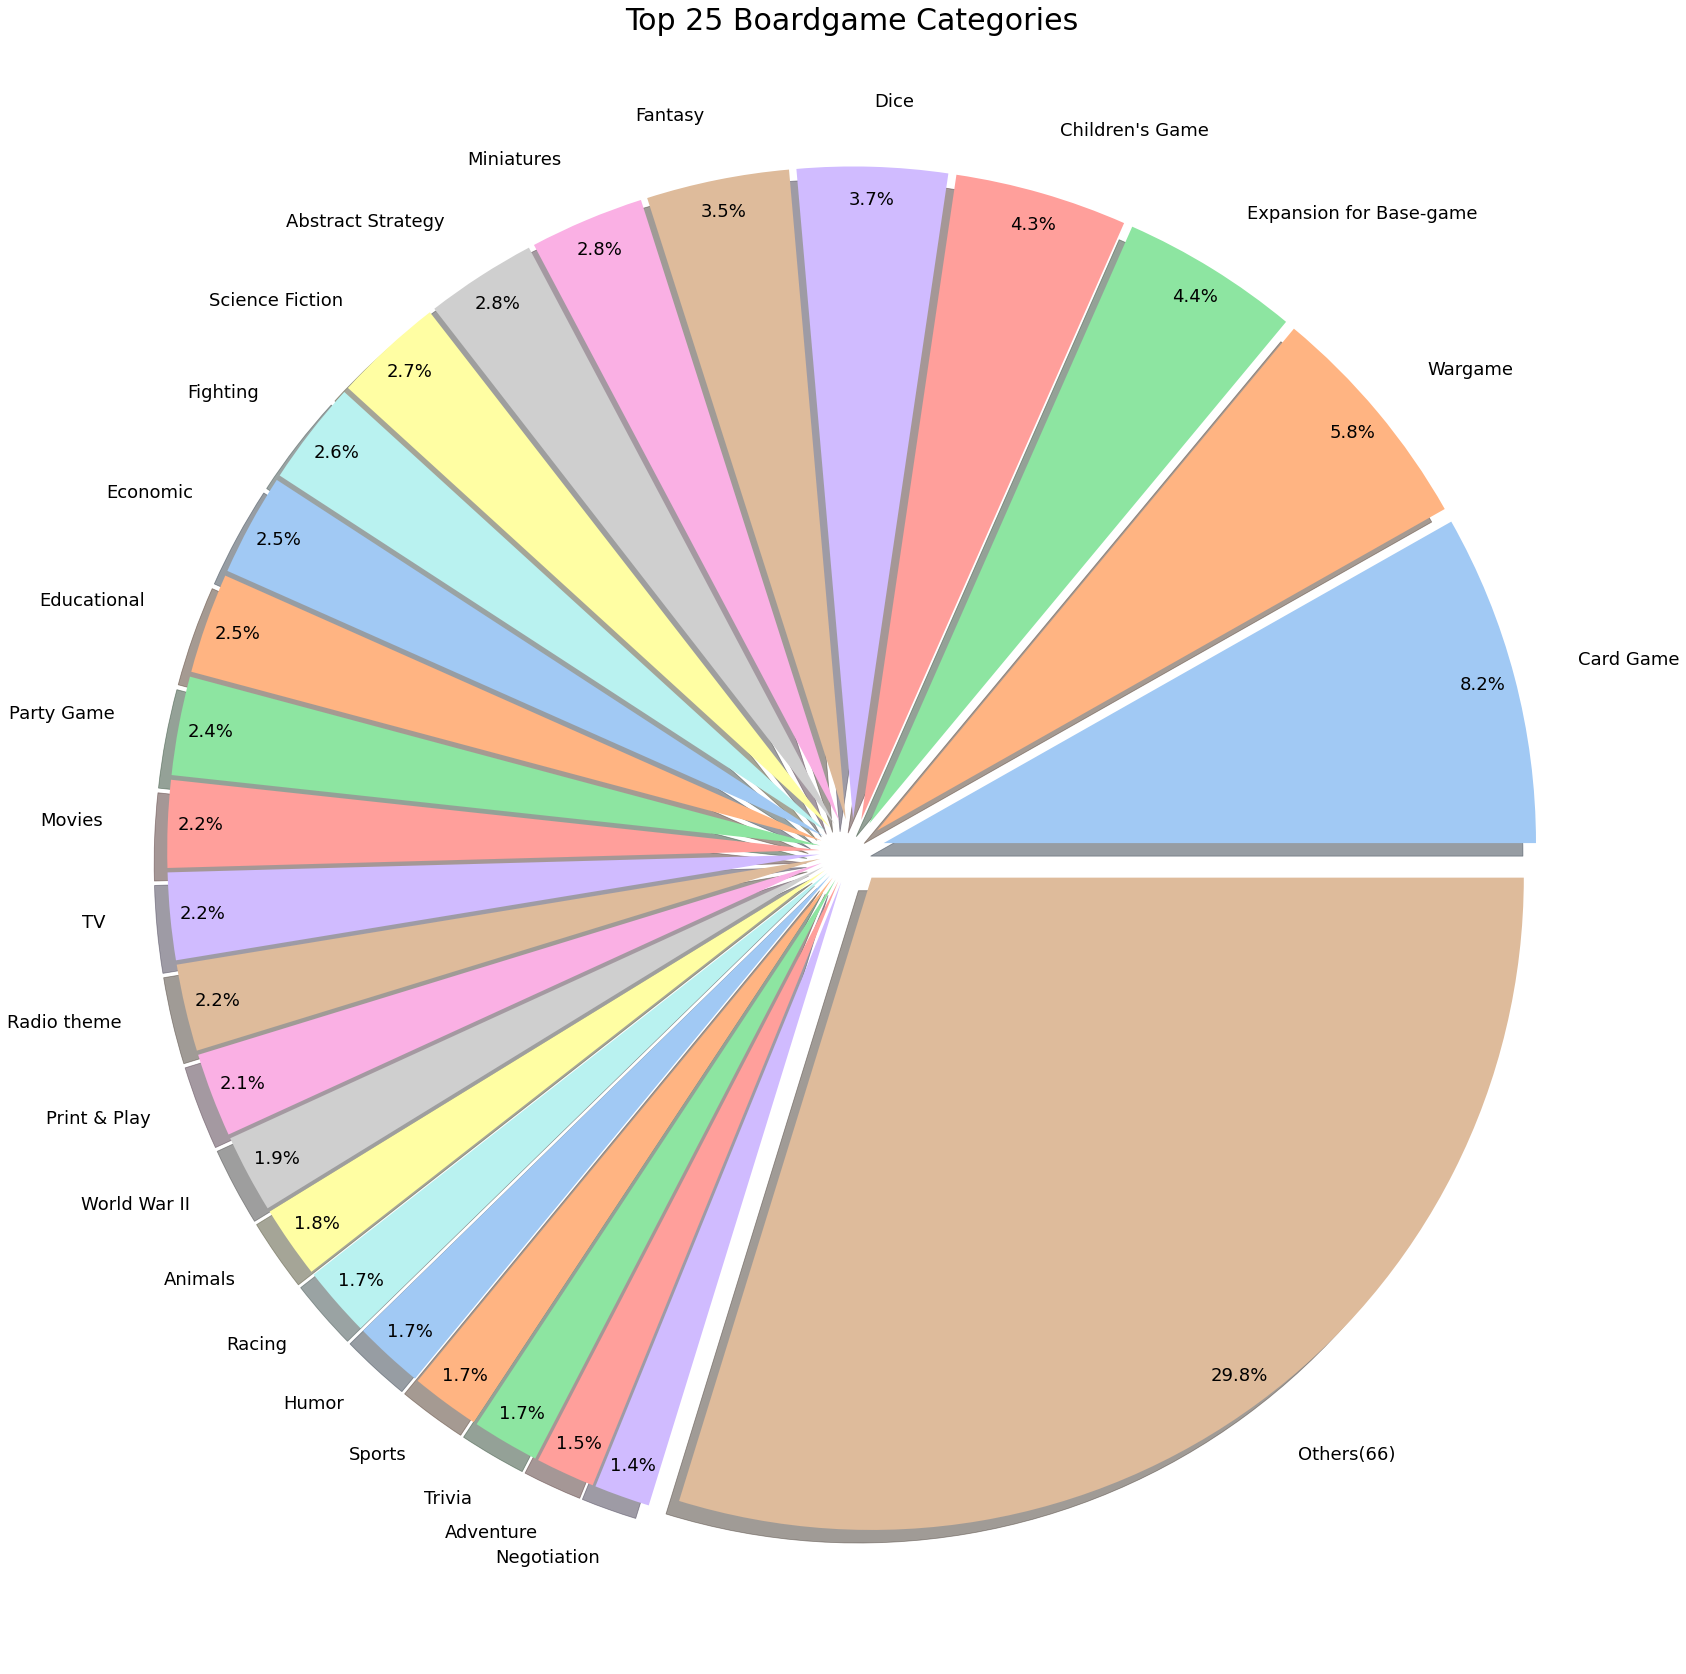

In [128]:
plot_cat_pie(cat_df,'Category','Categories',25)

### plotting for game mechanics

In [95]:
worddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74264 entries, 0 to 74263
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game.id      74264 non-null  int64 
 1   name         74264 non-null  object
 2   description  74264 non-null  object
 3   category     74264 non-null  object
 4   mechanic     74264 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [104]:
mech_df = create_cat_df(worddata,'mechanic','Mechanics')

Number of unique Mechanics : 56


In [113]:
mech_df

,Mechanics,Num
0,Dice Rolling,20339
1,Spin and Move,13478
2,Roll,13478
3,Hand Management,10990
4,Set Collection,9058
5,Variable Player Powers,7289
6,Hex-and-Counter,6710
7,Card Drafting,6078
8,Tile Placement,4732
9,Modular Board,4598


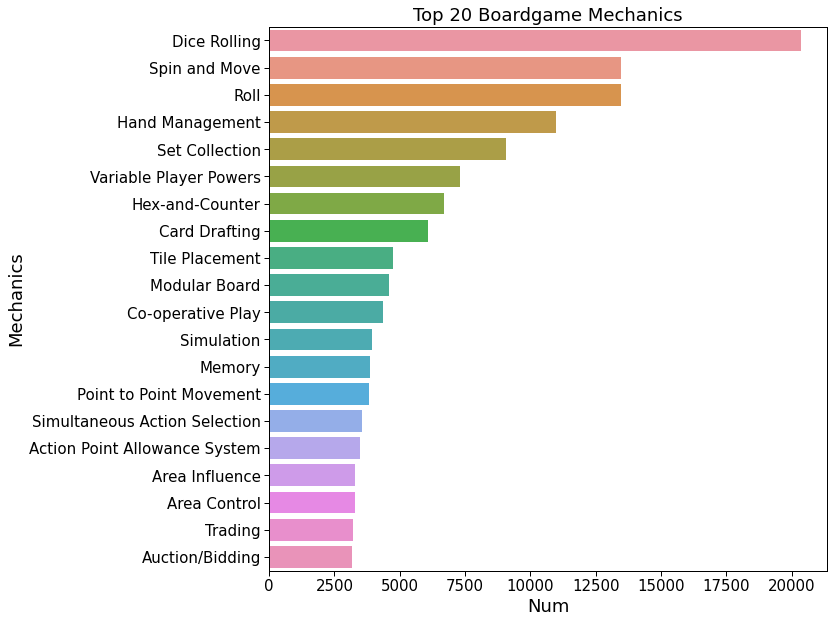

In [107]:
plot_cat_bar(mech_df,'Mechanics',20)

Number of Categories in Others: 36
36
                        Mechanics    Num
0   Dice Rolling                   20339
1   Spin and Move                  13478
2   Roll                           13478
3   Hand Management                10990
4   Set Collection                 9058 
5   Variable Player Powers         7289 
6   Hex-and-Counter                6710 
7   Card Drafting                  6078 
8   Tile Placement                 4732 
9   Modular Board                  4598 
10  Co-operative Play              4353 
11  Simulation                     3920 
12  Memory                         3855 
13  Point to Point Movement        3836 
14  Simultaneous Action Selection  3566 
15  Action Point Allowance System  3474 
16  Area Influence                 3278 
17  Area Control                   3278 
18  Trading                        3208 
19  Auction/Bidding                3177 
20  Others(36)                     49110


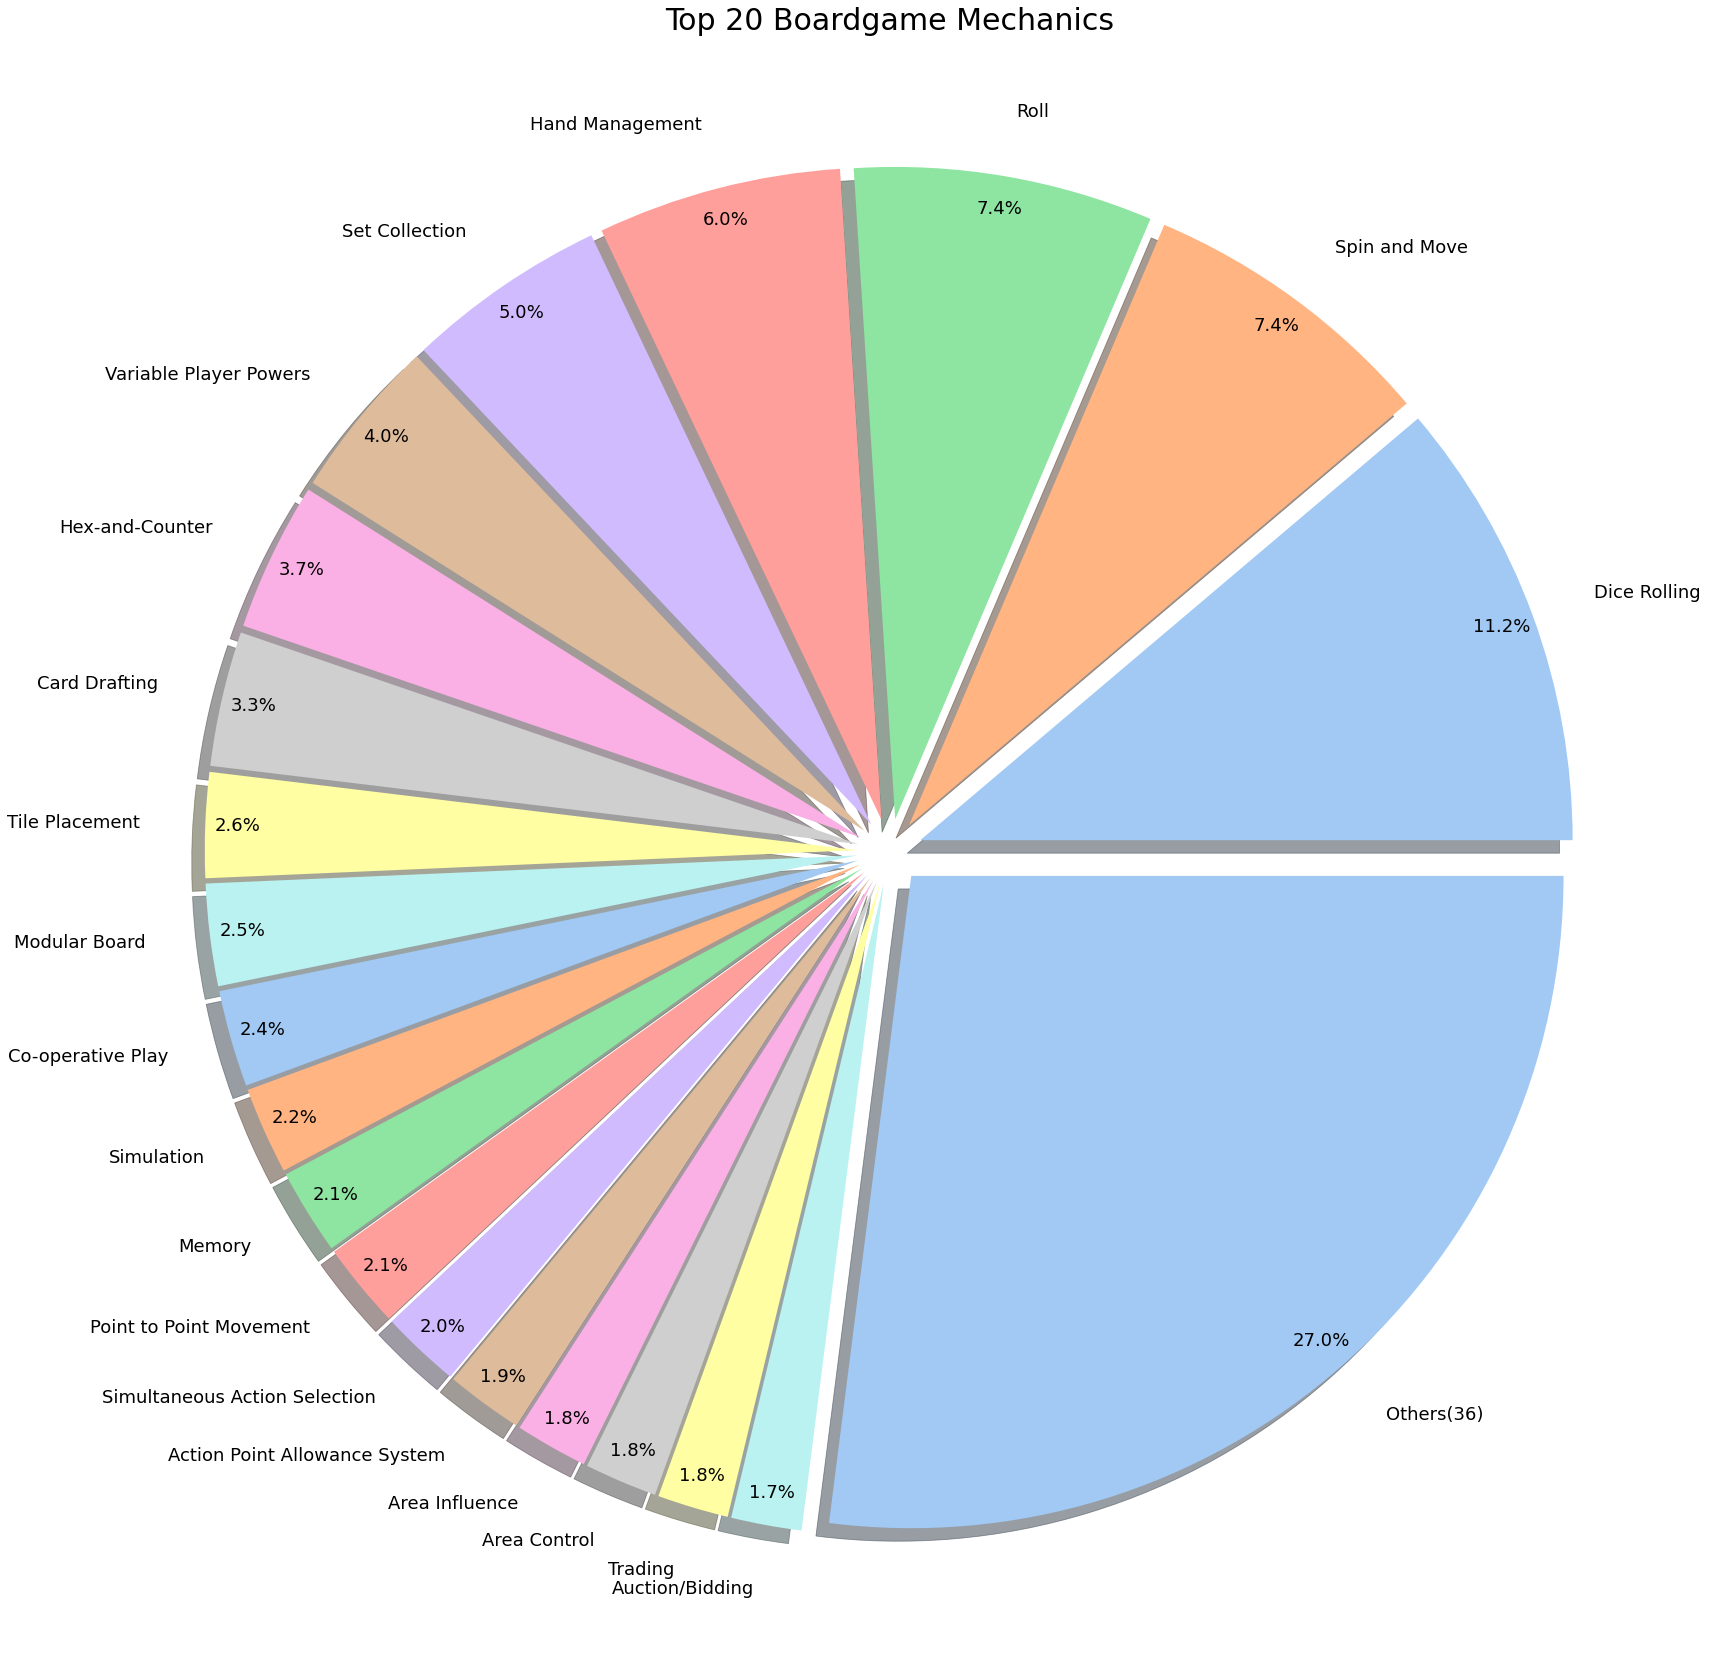

In [133]:
plot_cat_pie(mech_df,'Mechanics','Mechanics',20)

In [ ]:
aaa